## Importing necessary libraries and installing packages

In [1]:
import os  # For interacting with the operating system
import sys  # For interacting with the Python interpreter
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computing
import random  # For generating random numbers

import cv2  # For computer vision tasks
from PIL import Image  # For image processing

import matplotlib.pyplot as plt  # For plotting

import torch  # PyTorch library

## Ensure reproducibility

In [27]:
SEED = 42  # Setting the random seed for reproducibility

def seed_everything(seed=42):
    # Setting random seed for various libraries
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything() 

In [28]:
BASE_URL = os.path.join("../input", "airbus-ship-detection")  # Defining base URL for dataset
TRAIN_URL = os.path.join(BASE_URL, "train_v2")  # URL for training data
TEST_URL = os.path.join(BASE_URL, "test_v2")  # URL for test data

# Printing number of files in train and test directories
print("Train data:", len(os.listdir(TRAIN_URL)))
print("Test data:", len(os.listdir(TEST_URL)))

Train data: 192556
Test data: 15606


## Data import

In [29]:
df = pd.read_csv(os.path.join(BASE_URL, "train_ship_segmentations_v2.csv"))
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


# EDA

In [30]:
df.describe()

,ImageId,EncodedPixels
count,231723,81723
unique,192556,81722
top,e6fd0c12e.jpg,43801 1 44567 4 45334 5 46100 8 46867 9 47636 ...
freq,15,2


## Corrupted images

In [31]:
# props: https://www.kaggle.com/c/airbus-ship-detection/discussion/62921
corrupted_train_images = ['001ea610a.jpg', 	'004f97cfb.jpg', 	'0056fbc62.jpg', 	'00a0969df.jpg', 	'011257630.jpg', 	'0121138f0.jpg', 	'0129c0880.jpg', 	'022af9c92.jpg', 	'029b05d40.jpg', 	'02b609dce.jpg', 	'02beeabc5.jpg', 	'03b8fb899.jpg', 	'0410b8f70.jpg', 	'0440ed3f9.jpg', 	'044d23efa.jpg', 	'044d23efa.jpg', 	'044d23efa.jpg', 	'044d23efa.jpg', 	'044d23efa.jpg', 	'0471e6fa0.jpg', 	'04957ae67.jpg', 	'04bb76f99.jpg', 	'04e726188.jpg', 	'04eb1e8b4.jpg', 	'0535e1a6c.jpg', 	'05417a156.jpg', 	'0550b8734.jpg', 	'0564b16e7.jpg', 	'056949650.jpg', 	'059efc2ee.jpg', 	'05fa17552.jpg', 	'05fa17552.jpg', 	'062c18c1e.jpg', 	'06709073b.jpg', 	'06bc8167b.jpg', 	'06df94692.jpg', 	'06f01a9e2.jpg', 	'072d8cb01.jpg', 	'081674331.jpg', 	'082369109.jpg', 	'08242a82c.jpg', 	'0836642f7.jpg', 	'0845c0106.jpg', 	'0845c0106.jpg', 	'08f71ff06.jpg', 	'09473d9ad.jpg', 	'097403ec0.jpg', 	'097e21dfe.jpg', 	'098ad4a29.jpg', 	'0aaea74cc.jpg', 	'0ab2b818a.jpg', 	'0abdfa368.jpg', 	'0afa40357.jpg', 	'0b2a2aceb.jpg', 	'0b7d1c160.jpg', 	'0b7d1c160.jpg', 	'0b7d1c160.jpg', 	'0bbf29b74.jpg', 	'0c2d85ef6.jpg', 	'0c31bc7d4.jpg', 	'0c34ffdf6.jpg', 	'0c53e690b.jpg', 	'0c53e690b.jpg', 	'0c770634c.jpg', 	'0cdd31700.jpg', 	'0d3de0664.jpg', 	'0d7c1d566.jpg', 	'0d7c1d566.jpg', 	'0d7c1d566.jpg', 	'0dcfd29d7.jpg', 	'0dd67a278.jpg', 	'0e1c8dd01.jpg', 	'0e59df7fe.jpg', 	'0f0f6504d.jpg', 	'0f2fef46e.jpg', 	'0f71d5a4b.jpg', 	'10338335f.jpg', 	'10338335f.jpg', 	'1060c513f.jpg', 	'10e2b01e8.jpg', 	'10e2b01e8.jpg', 	'10e555277.jpg', 	'10f624e87.jpg', 	'1116ca6f4.jpg', 	'1116ca6f4.jpg', 	'1121598a1.jpg', 	'1121598a1.jpg', 	'1121598a1.jpg', 	'1121598a1.jpg', 	'1121598a1.jpg', 	'11391a0f1.jpg', 	'11c8b0413.jpg', 	'11c969cd3.jpg', 	'11de89754.jpg', 	'11f24ec8f.jpg', 	'121364ac3.jpg', 	'121364ac3.jpg', 	'121364ac3.jpg', 	'121364ac3.jpg', 	'121364ac3.jpg', 	'121364ac3.jpg', 	'121364ac3.jpg', 	'123929f3e.jpg', 	'125f07a28.jpg', 	'125f07a28.jpg', 	'125f07a28.jpg', 	'125f07a28.jpg', 	'125f07a28.jpg', 	'125f07a28.jpg', 	'1273f5123.jpg', 	'128267718.jpg', 	'12ab97857.jpg', 	'12ab97857.jpg', 	'12ab97857.jpg', 	'12ab97857.jpg', 	'12c801dfc.jpg', 	'12efb0b23.jpg', 	'12f2979c5.jpg', 	'135cf41db.jpg', 	'1393aeaae.jpg', 	'13a4986cf.jpg', 	'13a4986cf.jpg', 	'13a4986cf.jpg', 	'13a4986cf.jpg', 	'13a4986cf.jpg', 	'13a4986cf.jpg', 	'13a4986cf.jpg', 	'13a4986cf.jpg', 	'13a4986cf.jpg', 	'13c59294e.jpg', 	'13ed945ce.jpg', 	'1421f4b75.jpg', 	'147fb4f7a.jpg', 	'147fb4f7a.jpg', 	'14fb89f8b.jpg', 	'156d26e02.jpg', 	'15ffdc548.jpg', 	'15ffdc548.jpg', 	'162ccd90a.jpg', 	'162ccd90a.jpg', 	'162ccd90a.jpg', 	'162ccd90a.jpg', 	'16cc7f0a0.jpg', 	'1746475bb.jpg', 	'1752c7793.jpg', 	'1752c7793.jpg', 	'175f0bc4e.jpg', 	'175f0bc4e.jpg', 	'175f0bc4e.jpg', 	'175f0bc4e.jpg', 	'175f0bc4e.jpg', 	'175f0bc4e.jpg', 	'17d7c4bd1.jpg', 	'18290f091.jpg', 	'182a56e33.jpg', 	'18819e62b.jpg', 	'18cc4e06c.jpg', 	'18d89bbe2.jpg', 	'18e112157.jpg', 	'191e74913.jpg', 	'1958f1fa3.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'195b95a94.jpg', 	'198fff243.jpg', 	'1a428fcf7.jpg', 	'1a4e46004.jpg', 	'1aaf44c88.jpg', 	'1aaf44c88.jpg', 	'1aaf44c88.jpg', 	'1aec1fd16.jpg', 	'1b1e24318.jpg', 	'1b2abc76b.jpg', 	'1b2abc76b.jpg', 	'1b2abc76b.jpg', 	'1b2abc76b.jpg', 	'1b2abc76b.jpg', 	'1b323e779.jpg', 	'1b42c0672.jpg', 	'1b42c0672.jpg', 	'1b42c0672.jpg', 	'1b42c0672.jpg', 	'1b61ac95b.jpg', 	'1b6961c51.jpg', 	'1bae4f230.jpg', 	'1bc27c25c.jpg', 	'1c2f5a66f.jpg', 	'1c4b028af.jpg', 	'1c4cfa04e.jpg', 	'1ca76df97.jpg', 	'1cca0635a.jpg', 	'1cca0635a.jpg', 	'1cd965402.jpg', 	'1cfbd2620.jpg', 	'1d149759c.jpg', 	'1e7ab802f.jpg', 	'1e81c6d44.jpg', 	'1eb305c09.jpg', 	'1ec35352b.jpg', 	'1ed0b5229.jpg', 	'1f069dfda.jpg', 	'1f480fe3b.jpg', 	'1f5ad8dc6.jpg', 	'1f7011fd7.jpg', 	'1f928ebdc.jpg', 	'1f98ceb8e.jpg', 	'201c1380a.jpg', 	'2038d392e.jpg', 	'203c2fc8f.jpg', 	'20788d975.jpg', 	'20ae01f60.jpg', 	'2107b4f7f.jpg', 	'215889f73.jpg', 	'218c4f3cc.jpg', 	'21e3d870d.jpg', 	'21e3d870d.jpg', 	'22209626a.jpg', 	'23823f6ab.jpg', 	'23b83b31f.jpg', 	'243e947a8.jpg', 	'243e947a8.jpg', 	'243e947a8.jpg', 	'246a373a7.jpg', 	'246a373a7.jpg', 	'246a373a7.jpg', 	'246a373a7.jpg', 	'24860ff6d.jpg', 	'24860ff6d.jpg', 	'24a673ebf.jpg', 	'24c7238c3.jpg', 	'250876151.jpg', 	'251d13e3c.jpg', 	'2556c121c.jpg', 	'259c985dd.jpg', 	'26097bc5c.jpg', 	'263d07f21.jpg', 	'263d07f21.jpg', 	'26779b5d4.jpg', 	'26dcf3e39.jpg', 	'272070a14.jpg', 	'2790fc7f6.jpg', 	'2794d186c.jpg', 	'27fd4f43a.jpg', 	'282814b50.jpg', 	'2857528a0.jpg', 	'2857528a0.jpg', 	'285846038.jpg', 	'28b516013.jpg', 	'28db2ad2c.jpg', 	'29179588e.jpg', 	'294b4f564.jpg', 	'294cd1974.jpg', 	'294cd1974.jpg', 	'294cd1974.jpg', 	'29c475be6.jpg', 	'29c475be6.jpg', 	'2a3067530.jpg', 	'2a334e184.jpg', 	'2a334e184.jpg', 	'2a94b0e35.jpg', 	'2aba24f05.jpg', 	'2adc56e9d.jpg', 	'2ae0bd09b.jpg', 	'2b8bcadce.jpg', 	'2c146ada8.jpg', 	'2c5811d8f.jpg', 	'2d6e477f7.jpg', 	'2d8c8fd14.jpg', 	'2e9dc4312.jpg', 	'2eb0ac230.jpg', 	'2ecf72a4d.jpg', 	'2ee0dd2da.jpg', 	'2f10fe1a8.jpg', 	'2f1ba5759.jpg', 	'2f1d25b7e.jpg', 	'2f84e54fc.jpg', 	'3094427d1.jpg', 	'30a2f6511.jpg', 	'311fd7467.jpg', 	'3153e53de.jpg', 	'3153e53de.jpg', 	'3153e53de.jpg', 	'3153e53de.jpg', 	'3153e53de.jpg', 	'316c9615c.jpg', 	'316c9615c.jpg', 	'31c9d8cd8.jpg', 	'31c9d8cd8.jpg', 	'325c5d511.jpg', 	'329f36711.jpg', 	'32d3f6fbc.jpg', 	'32f191dd2.jpg', 	'3391b86d6.jpg', 	'34953e378.jpg', 	'34aee05e0.jpg', 	'34ce5bd83.jpg', 	'34ce5bd83.jpg', 	'34ce5bd83.jpg', 	'34ce5bd83.jpg', 	'34ce5bd83.jpg', 	'34ce5bd83.jpg', 	'3679c695e.jpg', 	'368606be6.jpg', 	'36abb1696.jpg', 	'36c1210a7.jpg', 	'36df7ff28.jpg', 	'36f935970.jpg', 	'36f935970.jpg', 	'36f935970.jpg', 	'36fb7e17c.jpg', 	'36fb7e17c.jpg', 	'372145a83.jpg', 	'373110419.jpg', 	'376a323d1.jpg', 	'376a323d1.jpg', 	'377f4db4c.jpg', 	'37fc39fee.jpg', 	'386cd5f4d.jpg', 	'38bf1471f.jpg', 	'38fe281b8.jpg', 	'39330e4b2.jpg', 	'397d8e801.jpg', 	'39ad874e3.jpg', 	'3a25d66bc.jpg', 	'3a25d66bc.jpg', 	'3abda681a.jpg', 	'3ad127b3e.jpg', 	'3ad127b3e.jpg', 	'3adc5fee3.jpg', 	'3b083919e.jpg', 	'3b98157ed.jpg', 	'3baa33013.jpg', 	'3bbb81478.jpg', 	'3bbb81478.jpg', 	'3c1b0cc0e.jpg', 	'3c2fef695.jpg', 	'3c2fef695.jpg', 	'3c36e3987.jpg', 	'3c74edc8e.jpg', 	'3c74edc8e.jpg', 	'3c74edc8e.jpg', 	'3c74edc8e.jpg', 	'3c74edc8e.jpg', 	'3c74edc8e.jpg', 	'3c74edc8e.jpg', 	'3c74edc8e.jpg', 	'3c9a461fb.jpg', 	'3cc1941f8.jpg', 	'3cc1941f8.jpg', 	'3cc1941f8.jpg', 	'3cc1941f8.jpg', 	'3cc1941f8.jpg', 	'3cdf7ef2c.jpg', 	'3d490be85.jpg', 	'3d549b3e5.jpg', 	'3d549b3e5.jpg', 	'3d7cd914a.jpg', 	'3dee10e9a.jpg', 	'3dee10e9a.jpg', 	'3df82cd9d.jpg', 	'3df95ce1c.jpg', 	'3e4b49b95.jpg', 	'3e536ebb4.jpg', 	'3e536ebb4.jpg', 	'3e536ebb4.jpg', 	'3e536ebb4.jpg', 	'3e536ebb4.jpg', 	'3e536ebb4.jpg', 	'3eabd2cc0.jpg', 	'3eb3be56e.jpg', 	'3ec4320cf.jpg', 	'3ec985aaa.jpg', 	'3ec985aaa.jpg', 	'3ec985aaa.jpg', 	'3ed47493a.jpg', 	'3ed47493a.jpg', 	'3ed47493a.jpg', 	'3ed47493a.jpg', 	'3ed47493a.jpg', 	'3ed47493a.jpg', 	'3f242bb4f.jpg', 	'3f477dc12.jpg', 	'40d2ab5b7.jpg', 	'40f3a5d07.jpg', 	'40f5e3905.jpg', 	'418bef51a.jpg', 	'418bef51a.jpg', 	'418bef51a.jpg', 	'4211b6416.jpg', 	'42afdde16.jpg', 	'42afdde16.jpg', 	'42c390ebc.jpg', 	'43142c0f3.jpg', 	'43f44815e.jpg', 	'442e83063.jpg', 	'447de2b0c.jpg', 	'4482203ed.jpg', 	'448a0f27a.jpg', 	'448a0f27a.jpg', 	'44a6d3b89.jpg', 	'44a6d3b89.jpg', 	'44ea1a5ee.jpg', 	'450c64160.jpg', 	'450c64160.jpg', 	'450c64160.jpg', 	'450c64160.jpg', 	'450c64160.jpg', 	'45132aa5c.jpg', 	'45132aa5c.jpg', 	'45132aa5c.jpg', 	'45132aa5c.jpg', 	'45132aa5c.jpg', 	'45132aa5c.jpg', 	'45132aa5c.jpg', 	'466048462.jpg', 	'467c0417c.jpg', 	'467c0417c.jpg', 	'46febe260.jpg', 	'4788a79c6.jpg', 	'48ec32e9a.jpg', 	'492301277.jpg', 	'492301277.jpg', 	'492301277.jpg', 	'493e11743.jpg', 	'49bcfae53.jpg', 	'49c76f263.jpg', 	'4b756254e.jpg', 	'4b92ed88c.jpg', 	'4bb41c80a.jpg', 	'4bc1c6b8d.jpg', 	'4c50c969d.jpg', 	'4d53f4d68.jpg', 	'4d54ee235.jpg', 	'4d76be2e0.jpg', 	'4dd93f56d.jpg', 	'4df182b49.jpg', 	'4e9e5b0f5.jpg', 	'4eb959fc1.jpg', 	'4eb959fc1.jpg', 	'4eec3f2eb.jpg', 	'4f16e3f9b.jpg', 	'503458960.jpg', 	'503458960.jpg', 	'5055e7ab6.jpg', 	'50d65abf2.jpg', 	'50d65abf2.jpg', 	'50f6aa064.jpg', 	'51ce7d5d9.jpg', 	'51ed5a313.jpg', 	'520adaafd.jpg', 	'521cf4845.jpg', 	'5224e6b3c.jpg', 	'523be8565.jpg', 	'523be8565.jpg', 	'523be8565.jpg', 	'523be8565.jpg', 	'523be8565.jpg', 	'5276e9661.jpg', 	'529d83d09.jpg', 	'52b0b2235.jpg', 	'52c959c77.jpg', 	'52d02a0bc.jpg', 	'5386b5c70.jpg', 	'5390c70f7.jpg', 	'53c06dd6e.jpg', 	'53c0b3258.jpg', 	'53c0b3258.jpg', 	'53c0b3258.jpg', 	'53c0b3258.jpg', 	'53c22ea24.jpg', 	'53c22ea24.jpg', 	'53c22ea24.jpg', 	'53d3773d3.jpg', 	'542fd9848.jpg', 	'546396805.jpg', 	'54b526acc.jpg', 	'54b526acc.jpg', 	'54b526acc.jpg', 	'5518fa0e9.jpg', 	'55491f573.jpg', 	'55796ba40.jpg', 	'5591f25c4.jpg', 	'56417e7af.jpg', 	'565758174.jpg', 	'5713a51d7.jpg', 	'572915a5d.jpg', 	'572ac7307.jpg', 	'572ac7307.jpg', 	'5753761d1.jpg', 	'57c111440.jpg', 	'57e7854e1.jpg', 	'5802e2635.jpg', 	'5802e2635.jpg', 	'59598d6e5.jpg', 	'59caafd26.jpg', 	'5a15a0ff4.jpg', 	'5a60d7464.jpg', 	'5a8fe36af.jpg', 	'5ab29febe.jpg', 	'5afadfeeb.jpg', 	'5b0573b2e.jpg', 	'5b10c3aee.jpg', 	'5b38b4f5e.jpg', 	'5c2b7e0b0.jpg', 	'5c6caad55.jpg', 	'5c76756cd.jpg', 	'5ce9d3971.jpg', 	'5d0c192b6.jpg', 	'5d3fe73f6.jpg', 	'5d518d410.jpg', 	'5d800157c.jpg', 	'5e0f3604d.jpg', 	'5e248115d.jpg', 	'5e248115d.jpg', 	'5e248115d.jpg', 	'5e248115d.jpg', 	'5e248115d.jpg', 	'5e248115d.jpg', 	'5e248115d.jpg', 	'5e248115d.jpg', 	'5f60979f4.jpg', 	'5f86c6c78.jpg', 	'60005f697.jpg', 	'609537e9c.jpg', 	'609537e9c.jpg', 	'60dc6af4e.jpg', 	'60ff4d19f.jpg', 	'618d1841e.jpg', 	'619975dba.jpg', 	'61e0635a9.jpg', 	'6241f480a.jpg', 	'6241f480a.jpg', 	'6251d7e1f.jpg', 	'6368f2024.jpg', 	'63aa75dca.jpg', 	'63aa75dca.jpg', 	'63e84277f.jpg', 	'644467444.jpg', 	'644e9cb14.jpg', 	'644e9cb14.jpg', 	'644e9cb14.jpg', 	'64825fc60.jpg', 	'64cfaebae.jpg', 	'6546dc45d.jpg', 	'659adba89.jpg',  '66c7c3361.jpg',  '66c7c3361.jpg', 	'66c7c3361.jpg', 	'66c7c3361.jpg', 	'671085a33.jpg', 	'67186dc31.jpg', 	'67ad5177d.jpg', 	'67c57bf5a.jpg', 	'67ee19d95.jpg', 	'688002f2e.jpg', 	'688002f2e.jpg', 	'688002f2e.jpg', 	'68e1516bf.jpg', 	'68e862af9.jpg', 	'68e862af9.jpg', 	'693e880b4.jpg', 	'697f60370.jpg', 	'697f60370.jpg', 	'6a47590e6.jpg', 	'6a4fc4db1.jpg', 	'6ab5ceabd.jpg', 	'6ae2803e7.jpg', 	'6ae2803e7.jpg', 	'6bbcd7d96.jpg', 	'6be716a29.jpg', 	'6be716a29.jpg', 	'6d619a7f1.jpg', 	'6e5b1abcc.jpg', 	'6e76845f8.jpg', 	'6e931cf2d.jpg', 	'6ea82464f.jpg', 	'6ea82464f.jpg', 	'6ea82464f.jpg', 	'6ea82464f.jpg', 	'6eb89349c.jpg', 	'6eb89349c.jpg', 	'6eb89349c.jpg', 	'6ef678207.jpg', 	'6f7123546.jpg', 	'6f7123546.jpg', 	'6f7123546.jpg', 	'6f7123546.jpg', 	'6f7123546.jpg', 	'6f7123546.jpg', 	'705361b29.jpg', 	'708f83f87.jpg', 	'710bffeec.jpg', 	'7113c5748.jpg', 	'7124ba0d1.jpg', 	'724d8c327.jpg', 	'73c7c74d9.jpg', 	'73fffb68b.jpg', 	'740cd0c9a.jpg', 	'741e6509a.jpg', 	'74c3317a9.jpg', 	'74c3317a9.jpg', 	'74c3317a9.jpg', 	'7509a3e18.jpg', 	'75b51c647.jpg', 	'75df1ca72.jpg', 	'75df1ca72.jpg', 	'75df1ca72.jpg', 	'7706b1f40.jpg', 	'7728c63eb.jpg', 	'7728c63eb.jpg', 	'7728c63eb.jpg', 	'7728c63eb.jpg', 	'7758aed5a.jpg', 	'7758aed5a.jpg', 	'7758aed5a.jpg', 	'7758aed5a.jpg', 	'7758aed5a.jpg', 	'77970be12.jpg', 	'77970be12.jpg', 	'77b2f51dd.jpg', 	'77d398335.jpg', 	'77f28a157.jpg', 	'77f28a157.jpg', 	'77f28a157.jpg', 	'77f4b6a70.jpg', 	'7818737fa.jpg', 	'78a5b0a2a.jpg', 	'790aae2ff.jpg', 	'791e81a92.jpg', 	'791e81a92.jpg', 	'791e81a92.jpg', 	'791e81a92.jpg', 	'791e81a92.jpg', 	'791e81a92.jpg', 	'791e81a92.jpg', 	'793a0cac2.jpg', 	'793a0cac2.jpg', 	'79472acc5.jpg', 	'79472acc5.jpg', 	'79472acc5.jpg', 	'7a00cab8f.jpg', 	'7a3f61040.jpg', 	'7a7b88704.jpg', 	'7a81bcb55.jpg', 	'7a81bcb55.jpg', 	'7af027173.jpg', 	'7b1082fee.jpg', 	'7b1082fee.jpg', 	'7b17a79b2.jpg', 	'7b17a79b2.jpg', 	'7b17a79b2.jpg', 	'7b1e5d175.jpg', 	'7b6cbedee.jpg', 	'7ba7a8b6e.jpg', 	'7ba7a8b6e.jpg', 	'7c8444029.jpg', 	'7d66a0505.jpg', 	'7ddb1e124.jpg', 	'7ea0f7949.jpg', 	'7eee35091.jpg', 	'7efe03bc1.jpg', 	'7f036720e.jpg', 	'7f14163e5.jpg', 	'7f92230cf.jpg', 	'7f92230cf.jpg', 	'7fdde64aa.jpg', 	'7ff71c5c0.jpg', 	'80c853e4e.jpg', 	'811d2221d.jpg', 	'812ad8bb1.jpg', 	'813c108f8.jpg', 	'813c108f8.jpg', 	'81fac3d6f.jpg', 	'82169ec3e.jpg', 	'83d568658.jpg', 	'83ecfe851.jpg', 	'83fde00e4.jpg', 	'83fe62cb9.jpg', 	'84520abab.jpg', 	'848c0cd9a.jpg', 	'84aac0e47.jpg', 	'84ad59a73.jpg', 	'84f53fddd.jpg', 	'84f53fddd.jpg', 	'84f53fddd.jpg', 	'851681437.jpg', 	'855a4d195.jpg', 	'861cf2b66.jpg', 	'86369c225.jpg', 	'86b2ff952.jpg', 	'86b2ff952.jpg', 	'86e4504c2.jpg', 	'8789ec5ca.jpg', 	'87cd384a1.jpg', 	'88193b368.jpg', 	'8822d4241.jpg', 	'88280d7e6.jpg', 	'884f9d5fa.jpg', 	'885010570.jpg', 	'886e22385.jpg', 	'890b7bd90.jpg', 	'89187f4f1.jpg', 	'89c4b957a.jpg', 	'89d30c34a.jpg', 	'8a0542232.jpg', 	'8a1b69841.jpg', 	'8ad511060.jpg', 	'8b6700224.jpg', 	'8b7472a2a.jpg', 	'8b96ac931.jpg', 	'8b96ac931.jpg', 	'8bf7a14fa.jpg', 	'8bffacca1.jpg', 	'8c0a50f5d.jpg', 	'8cc6108cd.jpg', 	'8d3de19bf.jpg', 	'8d3de19bf.jpg', 	'8d3de19bf.jpg', 	'8d627783a.jpg', 	'8d7cec72f.jpg', 	'8d7cec72f.jpg', 	'8d7cec72f.jpg', 	'8d7cec72f.jpg', 	'8e14cef41.jpg', 	'8e14cef41.jpg', 	'8e4133c62.jpg', 	'8e4133c62.jpg', 	'8e4eafe06.jpg', 	'8e4f6eb50.jpg', 	'8e951a256.jpg', 	'8edb2e579.jpg', 	'8edbc16aa.jpg', 	'8f222e017.jpg', 	'8f65e8b8a.jpg', 	'8f65e8b8a.jpg', 	'8f65e8b8a.jpg', 	'8f65e8b8a.jpg', 	'8f6bdd5c7.jpg', 	'901411c74.jpg', 	'90169bab2.jpg', 	'90f82f54c.jpg', 	'913c306c9.jpg', 	'913db052e.jpg', 	'91d306e75.jpg', 	'9287423dd.jpg', 	'928e51acb.jpg', 	'9290f50b3.jpg', 	'92937ff78.jpg', 	'929aae911.jpg', 	'929aae911.jpg', 	'929aae911.jpg', 	'943e4f466.jpg', 	'945905d30.jpg', 	'945905d30.jpg', 	'945905d30.jpg', 	'945905d30.jpg', 	'945905d30.jpg', 	'945905d30.jpg', 	'945905d30.jpg', 	'945905d30.jpg', 	'945d65a8e.jpg', 	'947f67766.jpg', 	'94827962f.jpg', 	'94827962f.jpg', 	'94827962f.jpg', 	'94a239f3e.jpg', 	'94ab7c409.jpg', 	'94d773f00.jpg', 	'94eddc51a.jpg', 	'94eddc51a.jpg', 	'94eddc51a.jpg', 	'94ef0ca29.jpg', 	'955f86d96.jpg', 	'955f86d96.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'957e87a7a.jpg', 	'95e202702.jpg', 	'963b3dcb9.jpg', 	'9646124e4.jpg', 	'9646124e4.jpg', 	'9646124e4.jpg', 	'96b719c2c.jpg', 	'96b719c2c.jpg', 	'96caa5aa1.jpg', 	'96fbcff1c.jpg', 	'971a709ac.jpg', 	'97397ce75.jpg', 	'97c3b23c2.jpg', 	'97dd70b27.jpg', 	'97fdde548.jpg', 	'97fdde548.jpg', 	'98a678c5c.jpg', 	'98aedefbe.jpg', 	'998c9abac.jpg', 	'998c9abac.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99aecf87e.jpg', 	'99d1c9973.jpg', 	'9a554a5fc.jpg', 	'9aca34158.jpg', 	'9aca34158.jpg', 	'9aca34158.jpg', 	'9aca34158.jpg', 	'9aca34158.jpg', 	'9aca34158.jpg', 	'9aca34158.jpg', 	'9bcaf1de8.jpg', 	'9bee051e1.jpg', 	'9bee051e1.jpg', 	'9c2cdc939.jpg', 	'9c31768d7.jpg', 	'9c4928b09.jpg', 	'9c4b93551.jpg', 	'9c67f71b4.jpg', 	'9c9c811d4.jpg', 	'9c9c811d4.jpg', 	'9c9c811d4.jpg', 	'9c9c811d4.jpg', 	'9ccf54fca.jpg', 	'9ced8e171.jpg', 	'9d946e84d.jpg', 	'9d946e84d.jpg', 	'9de72c2f4.jpg', 	'9de779fbe.jpg', 	'9dfa90c01.jpg', 	'9e240ca49.jpg', 	'9eb247e6e.jpg', 	'9f5778842.jpg', 	'9f70223f9.jpg', 	'9f99779fb.jpg', 	'9ff44c0b9.jpg', 	'9ffd198e3.jpg', 	'9ffd198e3.jpg', 	'a04fa2434.jpg', 	'a070c59b5.jpg', 	'a0b3556ee.jpg', 	'a0b5ca69a.jpg', 	'a0c1973d2.jpg', 	'a1552561a.jpg', 	'a186d9936.jpg', 	'a1bfe1c37.jpg', 	'a1d1f20b0.jpg', 	'a1d1f20b0.jpg', 	'a1d1f20b0.jpg', 	'a1d1f20b0.jpg', 	'a1d1f20b0.jpg', 	'a1d1f20b0.jpg', 	'a20a04ffd.jpg', 	'a20a04ffd.jpg', 	'a231565d2.jpg', 	'a28a6fdf1.jpg', 	'a2a43ca82.jpg', 	'a2a43ca82.jpg', 	'a2a43ca82.jpg', 	'a2a43ca82.jpg', 	'a2e8cc5ea.jpg', 	'a2fb250ae.jpg', 	'a360ed9ba.jpg', 	'a394bd272.jpg', 	'a394bd272.jpg', 	'a3e0f84e0.jpg', 	'a4044d9c4.jpg', 	'a405e7a4f.jpg', 	'a484f9291.jpg', 	'a51cd98f9.jpg', 	'a527eef56.jpg', 	'a57a15459.jpg', 	'a593aded5.jpg', 	'a5958a38e.jpg', 	'a614b969c.jpg', 	'a614b969c.jpg', 	'a61cb16c0.jpg', 	'a631a6d34.jpg', 	'a6557e6d1.jpg', 	'a6654388a.jpg', 	'a6654388a.jpg', 	'a6bff6a84.jpg', 	'a6dee3873.jpg', 	'a7168ea7e.jpg', 	'a75dc5c66.jpg', 	'a78a82b25.jpg', 	'a84edcedd.jpg', 	'a84edcedd.jpg', 	'a89a55ae5.jpg', 	'a9212f0cf.jpg', 	'a9ee29812.jpg', 	'aa3462e34.jpg', 	'aa7ba1f19.jpg', 	'aac1fabc1.jpg', 	'aac4ddc64.jpg', 	'aad242acb.jpg', 	'aad242acb.jpg', 	'aad242acb.jpg', 	'ab02c05b9.jpg', 	'ab13e2ab9.jpg', 	'ab62a3930.jpg', 	'ab9950dd7.jpg', 	'abe42fbe5.jpg', 	'ac373eed2.jpg', 	'ac7d221f1.jpg', 	'ac87e8c6f.jpg', 	'ad0992d9f.jpg', 	'ad1373ee6.jpg', 	'ad246fb45.jpg', 	'ada080535.jpg', 	'ade08b9ae.jpg', 	'ade08b9ae.jpg', 	'ade08b9ae.jpg', 	'ade08b9ae.jpg', 	'ade08b9ae.jpg', 	'ae3f92490.jpg', 	'ae3f92490.jpg', 	'ae6ab7bbb.jpg', 	'aea685d5f.jpg', 	'af904d064.jpg', 	'afc5f7664.jpg', 	'b0aac75ec.jpg', 	'b0f535cfa.jpg', 	'b19a68a03.jpg', 	'b1dfd43e8.jpg', 	'b2033ad6e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b273e414e.jpg', 	'b312ba697.jpg', 	'b36748163.jpg', 	'b36748163.jpg', 	'b36748163.jpg', 	'b36748163.jpg', 	'b38ed41cc.jpg', 	'b3a80a390.jpg', 	'b3ba65123.jpg', 	'b450ebacd.jpg', 	'b450ebacd.jpg', 	'b492ad045.jpg', 	'b492ad045.jpg', 	'b492ad045.jpg', 	'b4bfa105d.jpg', 	'b4ee2ca17.jpg', 	'b50841a31.jpg', 	'b534fb4c1.jpg', 	'b5367e221.jpg', 	'b53a91be6.jpg', 	'b558e60c6.jpg', 	'b558e60c6.jpg', 	'b558e60c6.jpg', 	'b558e60c6.jpg', 	'b558e60c6.jpg', 	'b5ed8fda5.jpg', 	'b68988217.jpg', 	'b717ec4e2.jpg', 	'b7226ace1.jpg', 	'b7226ace1.jpg', 	'b7226ace1.jpg', 	'b7327dc9f.jpg', 	'b7963b4f7.jpg', 	'b79cadd39.jpg', 	'b7ac727ff.jpg', 	'b7e682ee3.jpg', 	'b84cca6e1.jpg', 	'b88df0a00.jpg', 	'b8ba74347.jpg', 	'b8ce38df4.jpg', 	'b8d613105.jpg', 	'b8d613105.jpg', 	'b8d613105.jpg', 	'b8d613105.jpg', 	'b8e8c9ec0.jpg', 	'b8e8c9ec0.jpg', 	'b8e8c9ec0.jpg', 	'b8f10ed3b.jpg', 	'b92877a7d.jpg', 	'b962e3891.jpg', 	'b9ec8b476.jpg', 	'ba748a160.jpg', 	'bad876d9c.jpg', 	'baefe2d18.jpg', 	'bb988d531.jpg', 	'bbe118d0b.jpg', 	'bbf13112d.jpg', 	'bbf17abad.jpg', 	'bbfa8b65b.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bc5e8715d.jpg', 	'bcafee0d1.jpg', 	'bcdd64143.jpg', 	'bdfce70ce.jpg', 	'be0b7192c.jpg', 	'beb4337d4.jpg', 	'bed0cf7e2.jpg', 	'bf5d7aabc.jpg', 	'bf8475532.jpg', 	'c0115713d.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c02a1ee0a.jpg', 	'c11bb1a95.jpg', 	'c186a9757.jpg', 	'c1edb197d.jpg', 	'c49dc7378.jpg', 	'c4badc806.jpg', 	'c5081e3c3.jpg', 	'c51ddef91.jpg', 	'c51ddef91.jpg', 	'c534e92c9.jpg', 	'c584c040a.jpg', 	'c5fb7b03a.jpg', 	'c621945f5.jpg', 	'c6f39e242.jpg', 	'c71d1f916.jpg', 	'c73f75ce3.jpg', 	'c7c4257b4.jpg', 	'c8129e2dd.jpg', 	'c83a06609.jpg', 	'c8d60d57e.jpg', 	'c8fedcb43.jpg', 	'c93f37bc5.jpg', 	'c93f37bc5.jpg', 	'c93f37bc5.jpg', 	'c93f37bc5.jpg', 	'c93f37bc5.jpg', 	'c9c0a11e5.jpg', 	'ca24984bf.jpg', 	'ca74d74a8.jpg', 	'ca758c00e.jpg', 	'cafa07e68.jpg', 	'cafa07e68.jpg', 	'cb2f37b03.jpg', 	'cb5694927.jpg', 	'cba69d4f1.jpg', 	'cbdd0c687.jpg', 	'cbf4fe49e.jpg', 	'cbf7391e5.jpg', 	'cc149f2dc.jpg', 	'ccdeae66c.jpg', 	'cd0ac5be2.jpg', 	'cd795a2f1.jpg', 	'cd831c5bb.jpg', 	'ce4545072.jpg', 	'cebbdf48d.jpg', 	'cff4b96b3.jpg', 	'cff4b96b3.jpg', 	'cffbb9ce1.jpg', 	'cffbb9ce1.jpg', 	'd02c1e0fd.jpg', 	'd069b2b78.jpg', 	'd0ea975f2.jpg', 	'd0ebae16c.jpg', 	'd1384d7be.jpg', 	'd140a9b04.jpg', 	'd18dd7aad.jpg', 	'd18dd7aad.jpg', 	'd18dd7aad.jpg', 	'd2113b597.jpg', 	'd248d957d.jpg', 	'd28124a24.jpg', 	'd2a8843df.jpg', 	'd2e3ddbd9.jpg', 	'd378cca4f.jpg', 	'd3ea128b2.jpg', 	'd40c1e4c1.jpg', 	'd442caa88.jpg', 	'd44b2b115.jpg', 	'd4514be2e.jpg', 	'd4674fc94.jpg', 	'd4bf25cbc.jpg', 	'd57c300de.jpg', 	'd59be973a.jpg', 	'd5bf3df92.jpg', 	'd5cadb1c2.jpg', 	'd5ffcae25.jpg', 	'd6232b43b.jpg', 	'd63f8ebb5.jpg', 	'd683342dd.jpg', 	'd696913ea.jpg', 	'd6c292a55.jpg', 	'd6d014ce6.jpg', 	'd6d014ce6.jpg', 	'd6d014ce6.jpg', 	'd6d014ce6.jpg', 	'd6d90a4d8.jpg', 	'd6f732d21.jpg', 	'd71d4086c.jpg', 	'd7a2a70ed.jpg', 	'd7d2c83fe.jpg', 	'd81c03426.jpg', 	'd8666823f.jpg', 	'd896a7f9b.jpg', 	'd8f027ae7.jpg', 	'd8f2d724d.jpg', 	'd92250493.jpg', 	'd9a003e3d.jpg', 	'd9a003e3d.jpg', 	'd9aebb1b4.jpg', 	'd9aebb1b4.jpg', 	'd9aebb1b4.jpg', 	'd9fb019d3.jpg', 	'dad2579cd.jpg', 	'dafdda969.jpg', 	'db26b4667.jpg', 	'db2d5952a.jpg', 	'db2d5952a.jpg', 	'db5d787da.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'db89227f9.jpg', 	'dbf82efe8.jpg', 	'dbf82efe8.jpg', 	'dc4ee69ba.jpg', 	'dccc88b1d.jpg', 	'dce80be08.jpg', 	'dd454e6db.jpg', 	'dd64a153b.jpg', 	'ddfc36407.jpg', 	'de4ec4586.jpg', 	'de59ee81b.jpg', 	'de61c760e.jpg', 	'de6cc9f6e.jpg', 	'de6cc9f6e.jpg', 	'de6cc9f6e.jpg', 	'de6cc9f6e.jpg', 	'debf6c97c.jpg', 	'dfa88aebf.jpg', 	'dfa88aebf.jpg', 	'e045e7416.jpg', 	'e0853b37a.jpg', 	'e0d10e477.jpg', 	'e0dbc7433.jpg', 	'e0edbc8b3.jpg', 	'e0ffa10b5.jpg', 	'e106870c9.jpg', 	'e1171d6aa.jpg', 	'e19e6df8d.jpg', 	'e1df61c04.jpg', 	'e1fe052e7.jpg', 	'e20e64d5d.jpg', 	'e20e64d5d.jpg', 	'e20e64d5d.jpg', 	'e20e64d5d.jpg', 	'e20e64d5d.jpg', 	'e20e64d5d.jpg', 	'e20e64d5d.jpg', 	'e23ff6a91.jpg', 	'e28d9f0df.jpg', 	'e2b48de41.jpg', 	'e2b48de41.jpg', 	'e3345a111.jpg', 	'e33b2a936.jpg', 	'e39aa7e65.jpg', 	'e413ed0e0.jpg', 	'e498fb2ed.jpg', 	'e5670efa9.jpg', 	'e5ed63911.jpg', 	'e6cd5dd1c.jpg', 	'e6cd5dd1c.jpg', 	'e6cd5dd1c.jpg', 	'e72ecff7e.jpg', 	'e7c9da271.jpg', 	'e7f471180.jpg', 	'e7f471180.jpg', 	'e89fb0a51.jpg', 	'e8b968c47.jpg', 	'e93679f6d.jpg', 	'e9378ca62.jpg', 	'e962150c2.jpg', 	'e9a895ff6.jpg', 	'e9c5a80c7.jpg', 	'e9d6705b1.jpg', 	'e9d6705b1.jpg', 	'e9d6705b1.jpg', 	'ead24a012.jpg', 	'eb69857be.jpg', 	'eb74ba98a.jpg', 	'ebaee1763.jpg', 	'ec37efadf.jpg', 	'ec699d2f2.jpg', 	'eca3a76cb.jpg', 	'eca3a76cb.jpg', 	'ecc70d005.jpg', 	'ececc8cf6.jpg', 	'ececc8cf6.jpg', 	'ececc8cf6.jpg', 	'ececc8cf6.jpg', 	'ed061599c.jpg', 	'ed2a74e3a.jpg', 	'ed2a74e3a.jpg', 	'ed2a74e3a.jpg', 	'ed2a74e3a.jpg', 	'ed2a74e3a.jpg', 	'ed2a74e3a.jpg', 	'ed2a74e3a.jpg', 	'ed4f08855.jpg', 	'ed539bc77.jpg', 	'ed974de7b.jpg', 	'ede846866.jpg', 	'ede846866.jpg', 	'ee5b4ab88.jpg', 	'ee5b4ab88.jpg', 	'ee6335453.jpg', 	'eef8fda61.jpg', 	'eefa38294.jpg', 	'ef6076fd1.jpg', 	'ef8464837.jpg', 	'ef8464837.jpg', 	'efc68db74.jpg', 	'f055c21b3.jpg', 	'f073dd78b.jpg', 	'f073dd78b.jpg', 	'f073dd78b.jpg', 	'f073dd78b.jpg', 	'f073dd78b.jpg', 	'f073dd78b.jpg', 	'f0ccb2c46.jpg', 	'f0d26e9cd.jpg', 	'f0f6a35e8.jpg', 	'f0f6a35e8.jpg', 	'f0f6a35e8.jpg', 	'f0f6a35e8.jpg', 	'f13222212.jpg', 	'f1f58c8d7.jpg', 	'f1fde74ea.jpg', 	'f26e9f942.jpg', 	'f26e9f942.jpg', 	'f32840d98.jpg', 	'f32840d98.jpg', 	'f32fdd07c.jpg', 	'f331e6546.jpg', 	'f34683d2a.jpg', 	'f3b2d24b5.jpg', 	'f3ee179de.jpg', 	'f4119e9b1.jpg', 	'f4119e9b1.jpg', 	'f43318a0f.jpg', 	'f43318a0f.jpg', 	'f43318a0f.jpg', 	'f4338461d.jpg', 	'f4d9576b4.jpg', 	'f4f2b6a40.jpg', 	'f5bdf20c4.jpg', 	'f5e49900e.jpg', 	'f60441c53.jpg', 	'f635fd4d3.jpg', 	'f66fb8582.jpg', 	'f70b33510.jpg', 	'f74d9f266.jpg', 	'f753505da.jpg', 	'f753505da.jpg', 	'f7c564a84.jpg', 	'f7f28fb37.jpg', 	'f81487b73.jpg', 	'f81555d7c.jpg', 	'f81555d7c.jpg', 	'f82a529b3.jpg', 	'f82a529b3.jpg', 	'f82a529b3.jpg', 	'f9020af03.jpg', 	'f97e843d3.jpg', 	'f98d30216.jpg', 	'f99525c0f.jpg', 	'f9aea36cd.jpg', 	'f9aea36cd.jpg', 	'f9aea36cd.jpg', 	'f9aea36cd.jpg', 	'f9aea36cd.jpg', 	'f9b414940.jpg', 	'f9b414940.jpg', 	'fa1c33ba7.jpg', 	'fa2597d5e.jpg', 	'fa2597d5e.jpg', 	'fae752f07.jpg', 	'fb213d2fe.jpg', 	'fb5b5324d.jpg', 	'fb5b5324d.jpg', 	'fb963a0f4.jpg', 	'fbdc10533.jpg', 	'fd3ce7d3f.jpg', 	'fd88c5e01.jpg', 	'fdb118bc8.jpg', 	'fdd7888eb.jpg', 	'fdf018a2d.jpg', 	'fe64679a1.jpg', 	'fe9c1528a.jpg', 	'ff00027e5.jpg', 	'ff00027e5.jpg', 	'ff00027e5.jpg', 	'ff00027e5.jpg', 	'ffe2c660e.jpg', 'fff37ad60.jpg']

# amount of corrupted images
print("Corrupted train images:", len(corrupted_train_images))

Corrupted train images: 1358


In [32]:
print("Dataset length before removal:",len(df))
df = df[~df['ImageId'].isin(corrupted_train_images)]
print("Dataset length after removal:",len(df))

Dataset length before removal: 231723
Dataset length after removal: 230365


## Image sizes

In [11]:
# get image dimension
def get_image_dimensions(image_path):
    # Open the image file and return its dimensions
    with Image.open(image_path) as img:
        return img.size
    
initial_image_shape = get_image_dimensions(os.path.join(TRAIN_URL, df.iloc[0]['ImageId']))  # Getting dimensions of the first image as an initial guees to compare
initial_image_shape  # Displaying the initial image shape

(768, 768)

In [3]:
# check all sizes using the get_image_dimensions
def check_sizes(df):
    # Iterating through the dataframe to check image sizes
    for index, row in df.iterrows():
        # Checking if the image dimensions are different from the initial image shape
        if get_image_dimensions(os.path.join(TRAIN_URL, row['ImageId'])) != initial_image_shape:
            print("The image with an index of", str(index), "has a different shape!")
            return

    print("All images have the", initial_image_shape, "size!")  # Printing if all images have the same shape
    
check_sizes(df)  # Calling the function to check image sizes

All images have the (768, 768) size!


## Handling nulls

In [33]:
# replacing NaNs with zeroes
df.fillna(0, inplace=True)
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,0
1,0001124c7.jpg,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


## Creating a new 'Ships' column

In [34]:
# Adding a new column 'Ships' based on the presence of ships
df['Ships'] = df['EncodedPixels'].apply(lambda x: 0 if x == 0 else 1)

# Converting the 'Ships' column to integer type
df['Ships'] = df['Ships'].astype(int)

# Printing the type of the first element in the 'Ships' column
print("Type of 'Ships':", type(df['Ships'][0]))

# Displaying the first few rows of the dataframe
df.head()

Type of 'Ships': <class 'numpy.int64'>


,ImageId,EncodedPixels,Ships
0,00003e153.jpg,0,0
1,0001124c7.jpg,0,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1


In [35]:
# Grouping the dataframe by 'ImageId' and aggregating the 'EncodedPixels' and 'Ships' columns
# Encoding pixels becomes [1,2,3,4,5,12,15,16,17] from [1,2,3,4,5], [12,15,16,17]
df = df.groupby('ImageId', as_index=False).agg({
    "EncodedPixels": lambda x: ' '.join(map(str, x)) if x.values[0] != 0 else 0,  # Concatenating non-zero EncodedPixels
    'Ships': 'sum'  # Summing up the number of ships
    
}).reset_index(drop=True)  # Resetting the index

# Displaying the modified dataframe
df.head(10)

,ImageId,EncodedPixels,Ships
0,00003e153.jpg,0,0
1,0001124c7.jpg,0,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,5
4,0001b1832.jpg,0,0
5,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,9
6,0002756f7.jpg,255784 2 256552 4 257319 7 258087 9 258854 12 ...,2
7,0002d0f32.jpg,0,0
8,000303d4d.jpg,0,0
9,00031f145.jpg,340363 1 341129 4 341896 6 342663 7 343429 10 ...,1


## Class balance

In [36]:
df["Ships"].value_counts()

Ships
0     149570
1      26806
2       7585
3       2919
4       1603
5        913
6        649
7        400
8        315
9        242
10       167
11       143
12       122
13        75
14        74
15        65
Name: count, dtype: int64

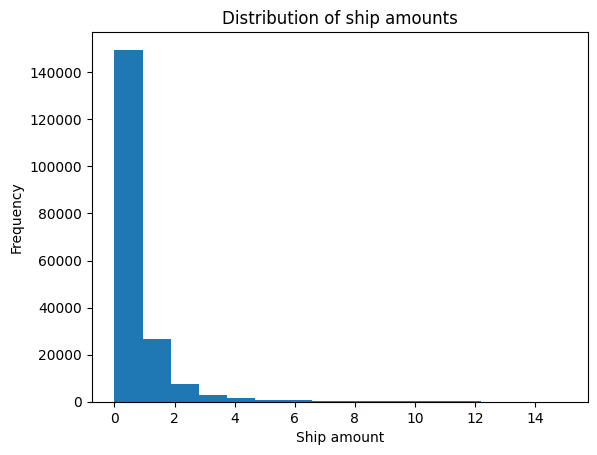

In [40]:
df["Ships"].plot(kind='hist', bins=len(df["Ships"].value_counts())) 
plt.title('Distribution of ship amounts')
plt.xlabel('Ship amount')
plt.ylabel('Frequency')
plt.show()

## Image visualization

In [16]:
def rle_decode_the_mask(mask_series: pd.Series, shape: tuple=None):
    """
    Decode an RLE-encoded mask from a pandas series.

    Parameters:
    - mask_series (pd.Series): Pandas series containing the mask (0/"0" if empty).
    - shape (tuple, optional): Shape of the image in case of resizing.

    Returns:
    - original_shape_mask (torch.Tensor): Decoded mask with masked pixels being white.
    """
    # Extracting the mask array from the series
    mask_array = mask_series.values
        
    # Checking if the mask is empty (no ships)
    if mask_array == 0 or mask_array == '0':
        return torch.zeros(shape)  # Returning a zero tensor
    else:
        mask_array = mask_array[0] # unpacking the mask

    # Creating a background mask based on the shape
    if shape is None:
        bg_mask = torch.zeros(768 * 768, dtype=torch.uint8)
    else:
        bg_mask = torch.zeros(shape[0] * shape[1], dtype=torch.uint8)

    # Splitting the mask array to decode RLE
    mask = mask_array.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (mask[0:][::2], mask[1:][::2])] # take each first value for pixel posiiton and each second - for the pixels qty after it
    starts -= 1  # Adjusting the start values to 0-indexing
    ends = starts + lengths  # Calculating the end values based on start and length


    # Create a mask with the shape of the original image
    original_shape_mask = torch.zeros(768 * 768, dtype=torch.uint8)

    # Assign 1 to the pixels based on RLE encoding
    for lo, hi in zip(starts, ends):
        original_shape_mask[lo:hi] = 1 # mark the "masked" pixels as white

    # If the shape is provided and different from the original image's shape, resize the mask
    if shape is not None:
        # Reshaping the mask to the original image dimensions (just in case)
        original_shape_mask = original_shape_mask.view(768, 768)

        # Resizing the mask to match the provided shape
        original_shape_mask = cv2.resize(original_shape_mask.numpy(), (shape[1], shape[0]), interpolation=cv2.INTER_LINEAR)

        # Converting the resized mask back to a PyTorch tensor
        original_shape_mask = torch.from_numpy(original_shape_mask)

    return original_shape_mask.T  # Returning the decoded mask


def encode_the_image(imagePath: str, shape: tuple=None):
    """
    Encode an image into a NumPy array with optional resizing.

    Parameters:
    - imagePath (str): The path to the image file.
    - shape (tuple, optional): The desired shape of the output image (height, width).

    Returns:
    - img (numpy.ndarray): Encoded image as a NumPy array; resized; color scheme: RGB.
    """
    # Read the image from the given path
    img = cv2.imread(imagePath)
    # Convert the color space from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image if a shape is provided
    if shape is not None:
        img = cv2.resize(img, shape, interpolation=cv2.INTER_LINEAR)
        
    return img  # Return the encoded image




def plot_the_image(imagePath: str, axis, shape: tuple=None):
    """
    Plot an image on a given axis with optional resizing.

    Parameters:
    - imagePath (str): The path to the image file.
    - axis: The matplotlib axis to plot the image.
    - shape (tuple, optional): The desired shape of the output image (height, width).
    """
    # Check if the image exists
    if not os.path.exists(imagePath):
        print("The image", imagePath, "is not found")
        return
    
    # Encode the image
    img = encode_the_image(imagePath, shape)
    
    # Resize the image if a shape is provided
    if shape is not None:
        img = cv2.resize(img, shape, interpolation=cv2.INTER_LINEAR)

    # Plot the image on the given axis
    if axis is not None:
        axis.imshow(img)
        axis.axis('off')

        

def plot_the_mask(mask_array: pd.Series, axis=None, shape: tuple=None):
    """
    Plot a mask on a given axis with optional resizing.

    Parameters:
    - mask_array (pd.Series): Pandas series containing the mask.
    - axis: The matplotlib axis to plot the mask.
    - shape (tuple, optional): The desired shape of the output mask (height, width).

    Returns:
    - None
    """
    # Decode the mask
    mask_decoded = rle_decode_the_mask(mask_array, shape)

    # Convert mask_decoded to numpy array
    mask_decoded_np = mask_decoded.numpy()

    # Reshape the mask if shape is provided
    if shape is not None:
        mask_decoded_resized = cv2.resize(mask_decoded_np, shape[::-1], interpolation=cv2.INTER_LINEAR)

    # Plot the mask on the given axis
    if axis is not None:
        axis.imshow(mask_decoded_resized, cmap='gray')
        axis.axis('off')

### Plot different images manually to get control over the ship amount

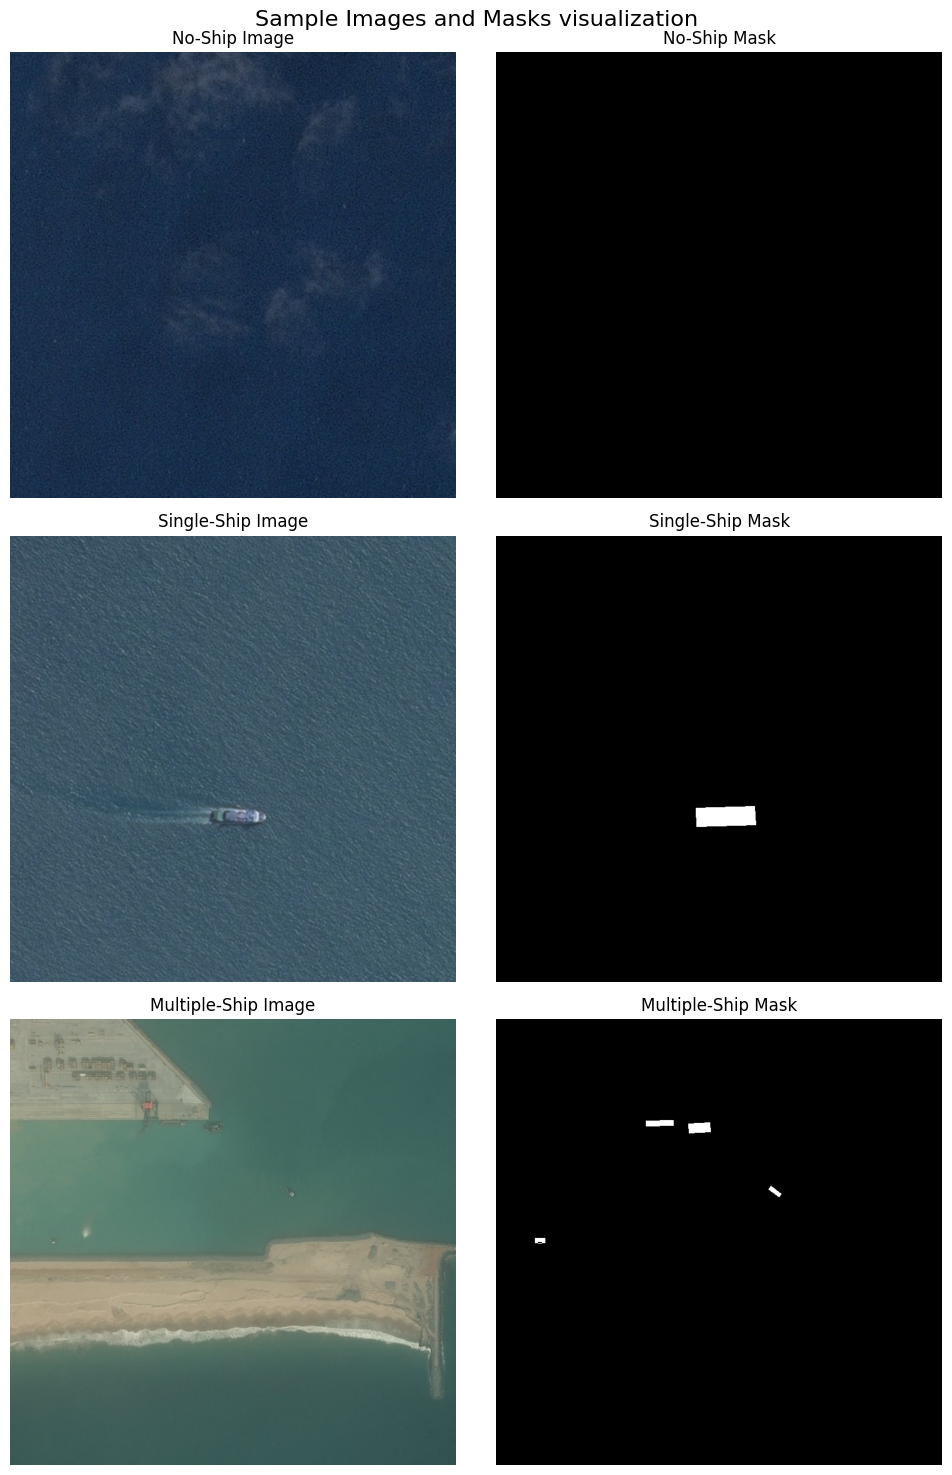

In [17]:
# create a figure for plotting
fig = plt.figure(figsize=(10, 15))
fig.suptitle('Sample Images and Masks visualization', fontsize=16)  # Main title

# create axis (3 rows, 2 columns)
axis = fig.subplots(3,2)

# show the image and its mask for a no-ship image
axis[0,0].set_title('No-Ship Image')  # Subtitle for the first column
plot_the_image(os.path.join(TRAIN_URL, "00003e153.jpg"), axis[0,0], shape=(768,768))
axis[0,1].set_title('No-Ship Mask')  # Subtitle for the second column
plot_the_mask(df[df['ImageId']=="00003e153.jpg"]['EncodedPixels'], axis[0,1], shape=(768,768))

# show the image and its mask for a single-ships image
axis[1,0].set_title('Single-Ship Image')  # Subtitle for the first column
plot_the_image(os.path.join(TRAIN_URL, "000155de5.jpg"), axis[1,0], shape=(768,768))
axis[1,1].set_title('Single-Ship Mask')  # Subtitle for the second column
plot_the_mask(df[df['ImageId']=="000155de5.jpg"]['EncodedPixels'], axis[1,1], shape=(768,768))

# show the image and its mask for a multiple-ships image
axis[2,0].set_title('Multiple-Ship Image')  # Subtitle for the first column
plot_the_image(os.path.join(TRAIN_URL, "000194a2d.jpg"), axis[2,0], shape=(768,768))
axis[2,1].set_title('Multiple-Ship Mask')  # Subtitle for the second column
plot_the_mask(df[df['ImageId']=="000194a2d.jpg"]['EncodedPixels'], axis[2,1], shape=(768,768))

plt.tight_layout() # remove the excessive space between the images
plt.show()

## Looking for disruptancies in file sizes

In [18]:
# Adding a new column 'Size_kb' to the dataframe by calculating the size of each image in kilobytes and mapping it to the 'ImageId' column
df['Size_kb'] = df['ImageId'].map(lambda img: os.stat(os.path.join(TRAIN_URL, img)).st_size/1024)
df.head()

,ImageId,EncodedPixels,Ships,Size_kb
0,00003e153.jpg,0,0,128.944336
1,0001124c7.jpg,0,0,76.059570
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1,147.625977
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,5,75.221680
4,0001b1832.jpg,0,0,95.627930


In [19]:
df['Size_kb'].describe()

count    191648.000000
mean        147.278237
std          54.263967
min           9.612305
25%         108.396484
50%         130.407227
75%         178.111816
max         511.942383
Name: Size_kb, dtype: float64

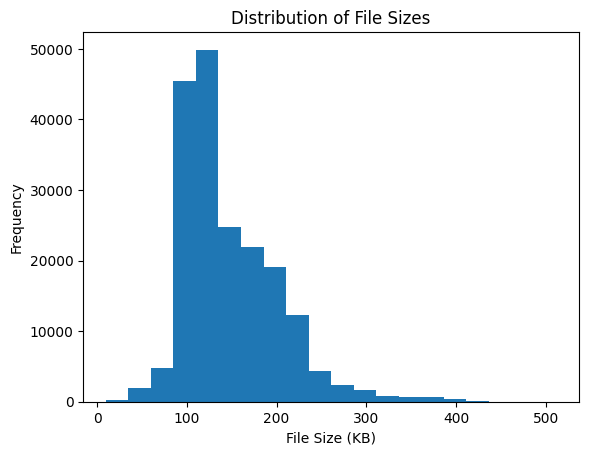

In [20]:
df['Size_kb'].plot(kind='hist', bins=20) 
plt.title('Distribution of File Sizes')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.show()

## Dropping low quality images + undersampling empty images

In [22]:
def drop_low_quality_images(df_input: pd.DataFrame, kb: int):
    """
    Drop low-quality images from the dataframe based on the specified size threshold.

    Parameters:
    - df_input (pd.DataFrame): Input dataframe containing the image size.
    - kb (int): Size threshold in kilobytes. Images with size less than or equal to this threshold will be dropped.

    Returns:
    - None
    """
    # Filtering out low-quality images based on size threshold
    df_LQ = df_input[np.floor(df_input['Size_kb']) <= kb]
    
    # Dropping low-quality images from the input dataframe
    df_input.drop(df_LQ.index, inplace=True)
    
    # Printing the number of dropped images
    print("Successfully dropped", df_LQ.shape[0], "images")



def undersample_empty_images(df_in: pd.DataFrame, fraction_to_leave: float):
    """
    Undersample empty images (images with no ships) from the dataframe to achieve a specified fraction to leave.

    Parameters:
    - df_in (pd.DataFrame): Input dataframe containing image information.
    - fraction_to_leave (float): Fraction of empty images to leave after undersampling.

    Returns:
    - None
    """
    # initial df length
    original_len = len(df_in)
    # Selecting rows with no ships
    no_ships_df = df_in[df_in['Ships'] == 0]
    no_ships_len = len(no_ships_df)

    # Calculating the number of rows to keep
    rows_to_keep = int(no_ships_len * (1 - fraction_to_leave))

    # Sampling rows to drop based on the calculated number of rows to keep
    indexes_to_drop = no_ships_df.sample(rows_to_keep, random_state=SEED).index
    
    # Dropping the sampled indexes from the input dataframe
    df_in.drop(indexes_to_drop, inplace=True)
    print("Successfully undersampled", original_len - len(df_in), "images")

    
LOW_QUALITY_IMAGES_THRESHOLD = 52 # drop low quality / invalid images below or equal to this weight
NO_SHIP_IMAGES_AMOUNT_TO_LEAVE = 0.3 # Undersample the majority class (images without ships)

# drop low quality / invalid images
drop_low_quality_images(df, LOW_QUALITY_IMAGES_THRESHOLD)

print()

# Undersample the majority class (images without ships)
undersample_empty_images(df, NO_SHIP_IMAGES_AMOUNT_TO_LEAVE)

Successfully dropped 1478 images

Successfully undersampled 104140 images


## Saving the final version

In [24]:
# save the processed dataframe as .csv
df.to_csv('train_ship_segmentation_post_EDA.csv', index=False)